In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [16]:
results_db_2 = pd.read_pickle('data/results_db_dummy.pkl')
results_db_disa_2 = pd.read_pickle('data/results_db_disa_dummy.pkl')
results_db_disa_seller_2 = pd.read_pickle('data/results_db_disa_seller_dummy.pkl')
results_db_agree_buyer_2 = pd.read_pickle('data/results_db_agree_buyer_dummy.pkl')
results_db_agree_seller_2 = pd.read_pickle('data/results_db_agree_seller_dummy.pkl')

In [17]:
final_db_distributive_nego  = pd.concat([results_db_2
,results_db_disa_2
,results_db_disa_seller_2
,results_db_agree_buyer_2
,results_db_agree_seller_2],axis =0, ignore_index=True)

In [18]:
final_db_distributive_nego_accept = final_db_distributive_nego[~final_db_distributive_nego.reject]


final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs()) 

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\4225599326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['G_2'] = (final_db_distributive_nego_accept['U_b'] - final_db_distributive_nego_accept['U_s']).abs() / (final_db_distributive_nego_accept['U_b'].abs() + final_db_distributive_nego_accept['U_s'].abs())


In [19]:
#final_db_distributive_nego_accept['Control']
def calculate_value(offer,cost):
    return offer - cost

def sellers_value(offer,cost_of_production):
    return calculate_value(offer,cost_of_production)
def buyers_value(offer,willingness_to_pay):
    return calculate_value(willingness_to_pay,offer)



def gini_coeff(sellers_value,buyers_value):
    
    return np.absolute( buyers_value - sellers_value)/(buyers_value + sellers_value)
    

cost_of_production = 40
willingness_to_pay = 60

In [30]:
B_NBS_farthest,S_NBS_farthest

(50, 50)

In [115]:
final_db_distributive_nego_accept['RFD']

0      0.10
1      0.10
2      0.04
3      0.04
4     -0.00
       ... 
491    0.10
492    0.10
493    0.14
494    0.10
495   -0.00
Name: RFD, Length: 467, dtype: float64

In [377]:
#sms.Mediation??

B_NBS = buyers_value(50,willingness_to_pay)

S_NBS =  sellers_value(50,cost_of_production)


B_NBS_farthest = max( np.absolute(buyers_value(100,willingness_to_pay) - B_NBS) ,np.absolute( buyers_value(0,willingness_to_pay)- B_NBS ) ) 

S_NBS_farthest = max( np.absolute(sellers_value(100,cost_of_production) - S_NBS) ,np.absolute( sellers_value(0,cost_of_production)- S_NBS ) ) 



final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - B_NBS ) /B_NBS_farthest 
final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - S_NBS ) /S_NBS_farthest

#final_db_distributive_nego_accept['RFD'] =   final_db_distributive_nego_accept.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1

final_db_distributive_nego_accept['RFD'] =   (final_db_distributive_nego_accept['S_fairness'] - final_db_distributive_nego_accept['B_fairness'] )/2    #.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1





#Modified_Relative_Difference_P = (Actual_Player - NBS_Player) / (Utility_Max_P - Utility_Min_P)

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\4186451005.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - B_NBS ) /B_NBS_farthest
C:\Users\31721\AppData\Local\Temp\ipykernel_1104\4186451005.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - S_NBS ) /S_NBS_farthest
C:\Users\31721\AppData\Local\Temp\ipykernel_1104\4

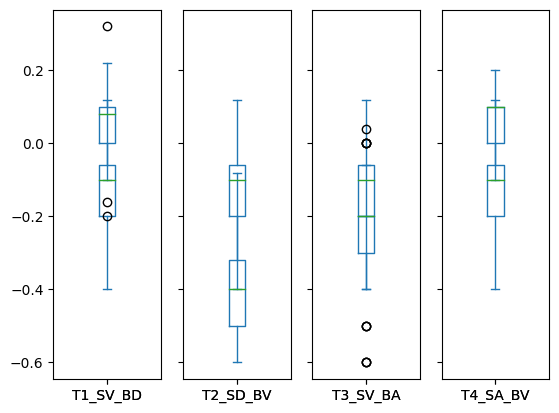

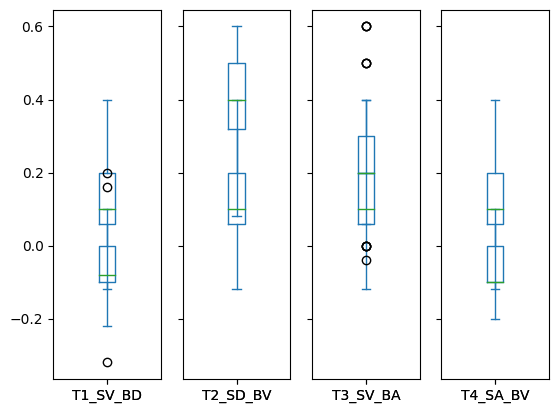

In [378]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots(1,4,sharey=1)
fig,ax2 = plt.subplots(1,4,sharey=1)


for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    temp_filter_df.groupby(j).plot(x =j, y = 'B_fairness',kind='box',ax = ax1[i],label = j)
    temp_filter_df.groupby(j).plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
    #temp_filter_df.plot(x =j, y = 'S_fairness',kind='box',ax = ax2[i],label = j)
plt.show()

In [379]:
import numpy as np
from scipy.interpolate import interp1d

def gini(v, n_new = 1000):
    """Compute Gini coefficient of array of values"""
    v_abs = np.sort(np.abs(v))
    cumsum_v = np.cumsum(v_abs)
    n = len(v_abs)
    vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])
    x = np.linspace(0, 1, n+1)
    f = interp1d(x=x, y=vals, kind='previous')
    xnew = np.linspace(0, 1, n_new+1)
    dx_new = 1/(n_new)
    vals_new = f(xnew)
    return 1 - 2 * np.trapz(y=vals_new, x=xnew, dx=dx_new)

gini(np.array([0, 0, 0,0,0,0,0]))

C:\Users\31721\AppData\Local\Temp\ipykernel_1104\1032702901.py:9: RuntimeWarning: invalid value encountered in divide
  vals = np.concatenate([[0], cumsum_v/cumsum_v[-1]])


nan

In [380]:
outcome_variables = [ 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price', 'U_s', 'U_b', 'B_fairness','S_fairness','RFD']

In [381]:


model_summaries ={ i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}
model_params = { i:{j:[] for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'] } for i in outcome_variables}



for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']:
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]
    
    for i in outcome_variables:
    
    
        Y = temp_filter_df[i]
        X = temp_filter_df[j]
        X = sm.add_constant(X)

        model = sm.OLS(Y, X).fit()

        model_summaries[i][j] = (model.summary2())
        model_params[i][j] = dict(radj = model.rsquared_adj
                        ,df_resid = model.df_resid
                        ,coeff = model.params
                        ,p = model.pvalues
                        ,SEs = model.bse)

#final_db_distributive_nego_accept.columns






In [382]:
model_params['RFD'].keys(), model_params['RFD']['T1_SV_BD'].keys()

(dict_keys(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']),
 dict_keys(['radj', 'df_resid', 'coeff', 'p', 'SEs']))

In [383]:
#final_db_distributive_nego_accept['G_2'].plot(kind='box')

In [384]:
#model_params[i][j]#['coeff']
regression_analysis = {k:[] for k in model_params.keys()}



for i,j in model_params.items():
    k_ra = []
    for k,m in j.items():
        #for n,m in l.items():
        coeff_ = dict(Treatment=k)
        p = m['p'].map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
        coeff_['Coeff'] = m['coeff'][k].round(2).astype(str) + p[k] 
        coeff_['Intercept'] = m['coeff']['const'].round(2)
        
        coeff_['SEs'] =  m['SEs'][k].round(2)#.map(lambda x : f" (SE:{x})" )
        coeff_['R^2 (adj)'] =  m['radj'].round(2)
        coeff_['Df_resid'] =  int(m['df_resid'])#.round(0)
        k_ra.append(coeff_)

    regression_analysis[i] = k_ra

    
    

#pd.DataFrame(regression_analysis ,index =model_params.keys()).T

In [385]:

for i in regression_analysis.keys():
    print(i,'---------------------------')
    display(pd.DataFrame(regression_analysis[i]).set_index('Treatment'))#.T

first_price ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.45,71.82,2.48,-0.01,185
T2_SD_BV,26.13***,71.82,1.97,0.49,180
T3_SV_BA,-2.75,71.82,2.29,0.00,196
T4_SA_BV,-18.65***,71.82,1.75,0.37,195


offer_counteroffer_diff ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,9.74***,22.93,2.68,0.06,185
T2_SD_BV,25.69***,22.93,2.10,0.45,180
T3_SV_BA,-11.46***,22.93,2.42,0.10,196
T4_SA_BV,-14.31***,22.93,1.79,0.24,195


negotiation_length ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,1.08***,5.18,0.17,0.18,185
T2_SD_BV,2.57***,5.18,0.14,0.67,180
T3_SV_BA,-2.11***,5.18,0.17,0.43,196
T4_SA_BV,-1.41***,5.18,0.14,0.33,195


last_price ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-9.58***,55.88,0.69,0.51,185
T2_SD_BV,15.04***,55.88,0.83,0.64,180
T3_SV_BA,6.1***,55.88,0.81,0.22,196
T4_SA_BV,-8.92***,55.88,0.64,0.50,195


U_s ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-9.58***,15.88,0.69,0.51,185
T2_SD_BV,15.04***,15.88,0.83,0.64,180
T3_SV_BA,6.1***,15.88,0.81,0.22,196
T4_SA_BV,-8.92***,15.88,0.64,0.50,195


U_b ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,9.58***,4.12,0.69,0.51,185
T2_SD_BV,-15.04***,4.12,0.83,0.64,180
T3_SV_BA,-6.1***,4.12,0.81,0.22,196
T4_SA_BV,8.92***,4.12,0.64,0.50,195


B_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,0.19***,-0.12,0.01,0.51,185
T2_SD_BV,-0.3***,-0.12,0.02,0.64,180
T3_SV_BA,-0.12***,-0.12,0.02,0.22,196
T4_SA_BV,0.18***,-0.12,0.01,0.50,195


S_fairness ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.19***,0.12,0.01,0.51,185
T2_SD_BV,0.3***,0.12,0.02,0.64,180
T3_SV_BA,0.12***,0.12,0.02,0.22,196
T4_SA_BV,-0.18***,0.12,0.01,0.50,195


RFD ---------------------------


,Coeff,Intercept,SEs,R^2 (adj),Df_resid
Treatment,,,,,
T1_SV_BD,-0.19***,0.12,0.01,0.51,185
T2_SD_BV,0.3***,0.12,0.02,0.64,180
T3_SV_BA,0.12***,0.12,0.02,0.22,196
T4_SA_BV,-0.18***,0.12,0.01,0.50,195


In [ ]:
0.07,-0.15,-0.24,-0.06

In [ ]:
import pingouin as pg

In [143]:

j = 'T1_SV_BD'
#for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]



Y = temp_filter_df['RFD']
X = temp_filter_df[j]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RFD   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     192.4
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.88e-30
Time:                        14:30:22   Log-Likelihood:                 177.17
No. Observations:                 187   AIC:                            -350.3
Df Residuals:                     185   BIC:                            -343.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.009    -12.403      0.000      -0.136      -0.099
T1_SV_BD       0.1917      0.014     13.870      0.000       0.164       0.219
==============================================================================
Omnibus:                        9.362   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.315
Skew:                          -0.503   Prob(JB):                      0.00949
Kurtosis:                       3.429   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#temp_filter_df.pivot??

In [68]:
#plt.boxplot??

In [82]:
#ax[0].plot??

In [169]:
#ax

In [386]:
from scipy.stats import pearsonr
import numpy as np


correlation_var = ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV', 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price',    'U_s', 'U_b', 'RFD']

corre_df = final_db_distributive_nego_accept [correlation_var] 
rho = corre_df.corr()
pval = corre_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho_2 = rho.round(2).astype(str) + p


Correlation_chart = pd.DataFrame(np.tril(rho_2, k=0),columns = corre_df.columns,index = corre_df.columns).replace(0,"")

for i in Correlation_chart.columns:
    for j in Correlation_chart.index:
        if i==j:
            Correlation_chart.loc[i,j] ="--"
pd.concat( [pd.DataFrame([corre_df.mean(),corre_df.std()],index = ['Mean','STD']).T.map(lambda x: np.around(x,2)), Correlation_chart  ],axis=1       )

,Mean,STD,Control,T1_SV_BD,T2_SD_BV,T3_SV_BA,T4_SA_BV,first_price,offer_counteroffer_diff,negotiation_length,last_price,U_s,U_b,RFD
Control,0.21,0.41,--,,,,,,,,,,,
T1_SV_BD,0.19,0.39,-0.25***,--,,,,,,,,,,
T2_SD_BV,0.18,0.38,-0.24***,-0.22***,--,,,,,,,,,
T3_SV_BA,0.21,0.41,-0.27***,-0.25***,-0.24***,--,,,,,,,,
T4_SA_BV,0.21,0.41,-0.27***,-0.25***,-0.24***,-0.27***,--,,,,,,,
first_price,71.88,19.35,-0.0,-0.01,0.63***,-0.08,-0.5***,--,,,,,,
offer_counteroffer_diff,23.90,20.26,-0.02,0.21***,0.57***,-0.32***,-0.39***,0.92***,--,,,,,
negotiation_length,5.10,1.97,0.02,0.28***,0.63***,-0.53***,-0.35***,0.66***,0.78***,--,,,,
last_price,56.17,10.50,-0.01,-0.45***,0.65***,0.29***,-0.45***,0.72***,0.44***,0.31***,--,,,
U_s,16.17,10.50,-0.01,-0.45***,0.65***,0.29***,-0.45***,0.72***,0.44***,0.31***,1.0***,--,,


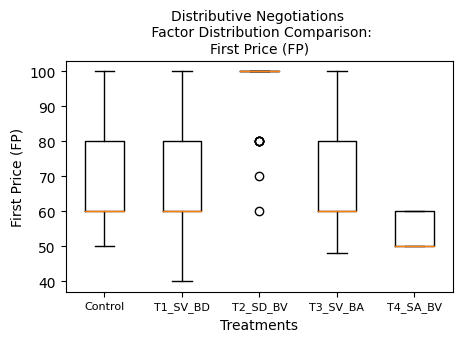

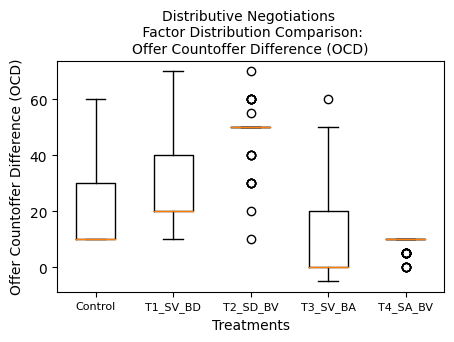

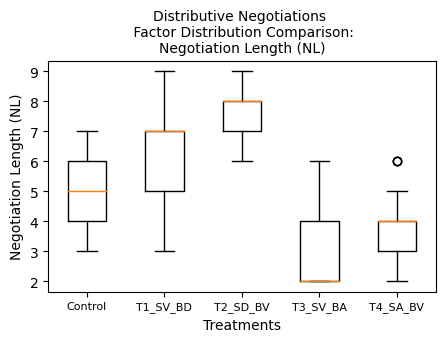

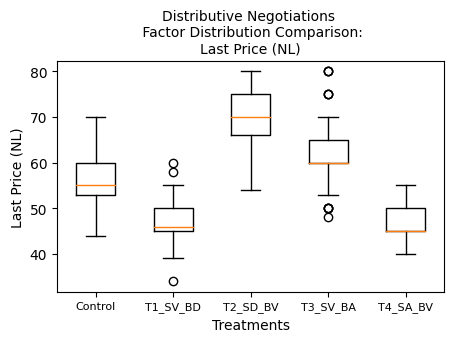

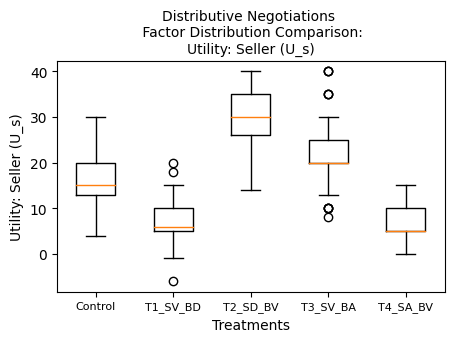

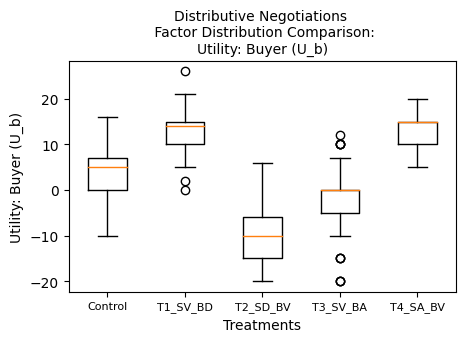

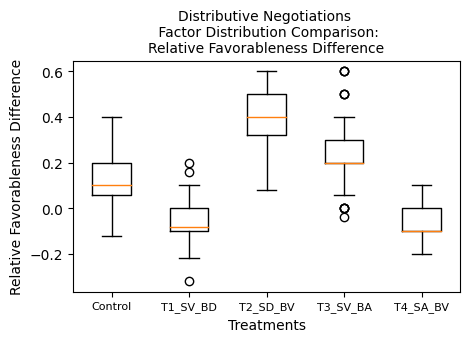

In [387]:
import matplotlib.pyplot as plt





DV_map = {'first_price' : 'First Price (FP)' , 'offer_counteroffer_diff' : 'Offer Countoffer Difference (OCD)',  'negotiation_length' : 'Negotiation Length (NL)', 'last_price' : 'Last Price (NL)',    'U_s' : 'Utility: Seller (U_s)', 'U_b' : 'Utility: Buyer (U_b)', 'RFD' : 'Relative Favorableness Difference'}



for i,k in enumerate([ 'first_price', 'offer_counteroffer_diff',  'negotiation_length', 'last_price',    'U_s', 'U_b', 'RFD']):

    fig,ax = plt.subplots(1,sharex=1, figsize = [5,3])

    data = [final_db_distributive_nego_accept[final_db_distributive_nego_accept['Control']==1][k].values] + [final_db_distributive_nego_accept[final_db_distributive_nego_accept[j]==1][k].values for j in ['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']]
    
    ax.boxplot(data)
        
    # Add labels and title
    ax.set_xlabel('Treatments')
    k_ = DV_map[k]
    ax.set_ylabel(k_)
    ax.set_title('Distributive Negotiations \n Factor Distribution Comparison:\n'+k_,  fontsize=10)
    
    # Customize x-axis ticks
    ax.set_xticks([1, 2,3,4,5], ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV'],  fontsize=8)
    # Show the plot
    plt.savefig('Images/Distributive/Factor_Dist_'+k, dpi=600, bbox_inches="tight")
    plt.show()


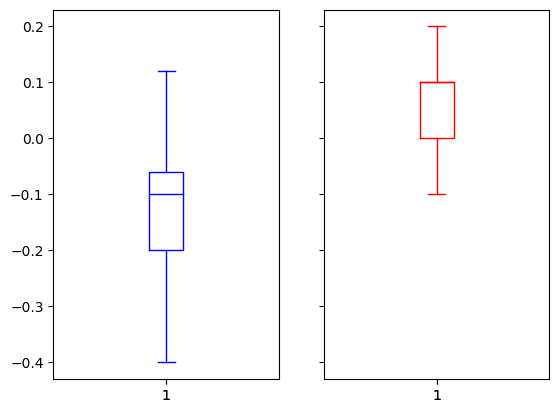

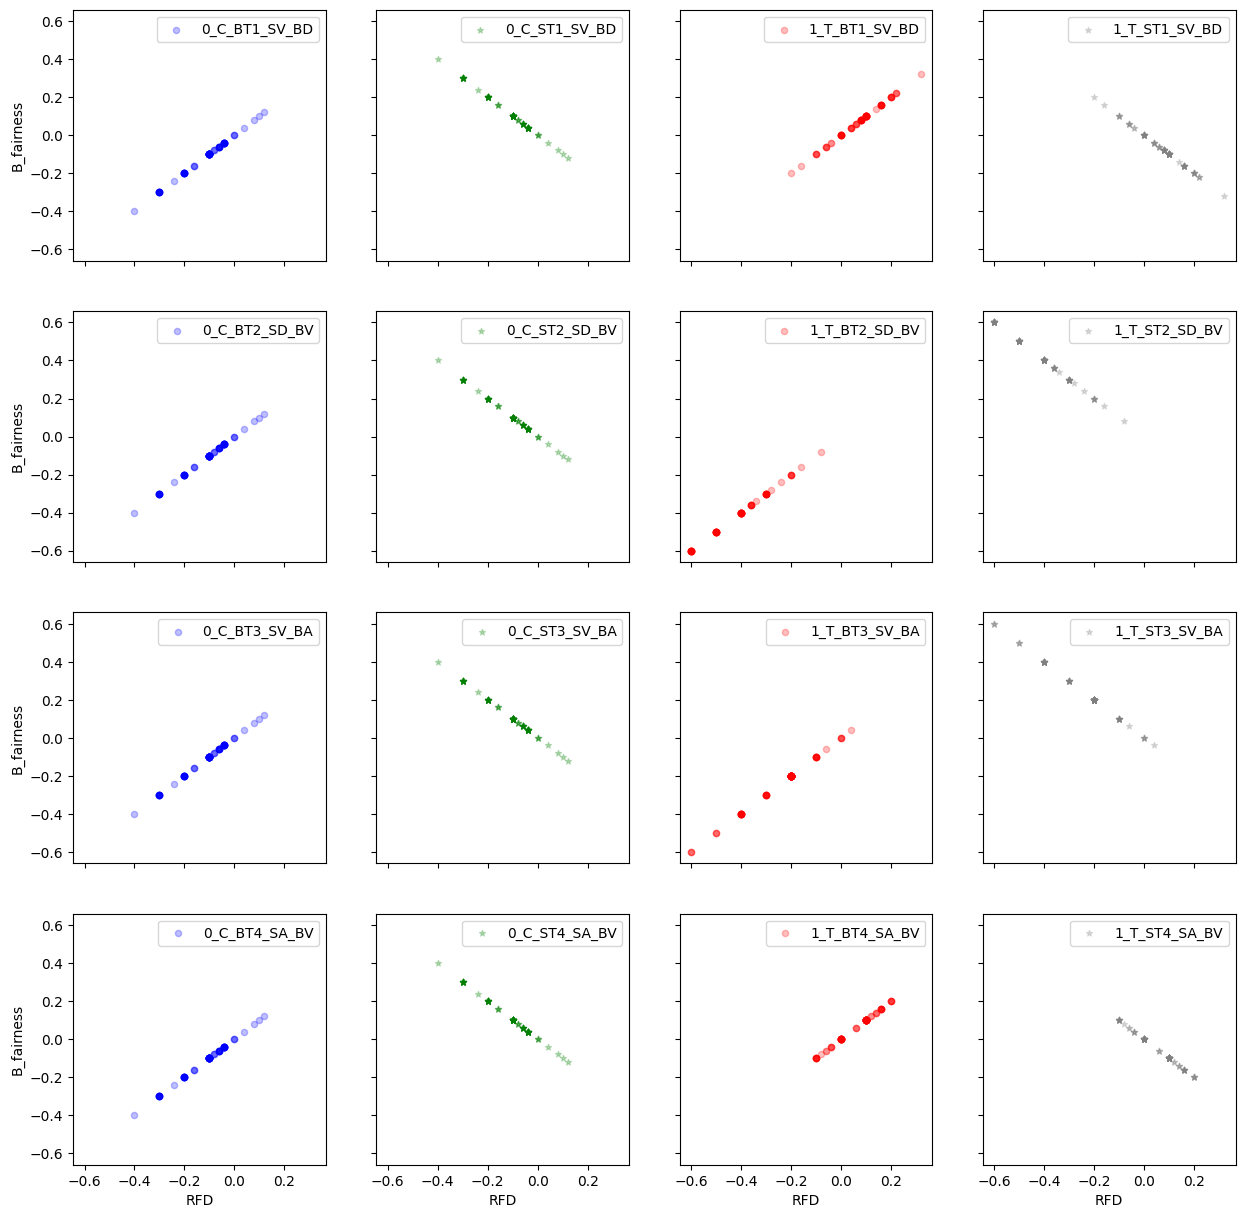

In [148]:
'U_s', 'U_b', 'B_fairness','S_fairness'


fig,ax = plt.subplots(1,2,sharey=1,sharex=1)

temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]


temp_filter_df[temp_filter_df[j]==0].plot(y='RFD',kind='box',ax = ax[0], color='b',label = '0' )
temp_filter_df[temp_filter_df[j]==1].plot(y='RFD',kind='box',ax = ax[1], color='r',label = '1' )

plt.show()

fig,ax = plt.subplots(4,4,sharey=1,sharex=1, figsize = [15,15])


for i,j in enumerate(['T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1) | ( final_db_distributive_nego_accept['Control']==1)]

    
    #ax[0].plot('RFD',{'B_fairness','S_fairness'],data=temp_filter_df[temp_filter_df[j]==0] )
    
    
    
    temp_filter_df[temp_filter_df[j]==0].plot(y='B_fairness',x='RFD',kind='scatter',ax = ax[i][0], color='b',label = '0_C_B'+j , alpha = 0.25, marker = 'o')
    temp_filter_df[temp_filter_df[j]==1].plot(y='B_fairness',x='RFD',kind='scatter',ax = ax[i][2], color='r',label = '1_T_B'+j , alpha = 0.25, marker = 'o')
    temp_filter_df[temp_filter_df[j]==0].plot(y='S_fairness',x='RFD',kind='scatter',ax = ax[i][1], color='g',label = '0_C_S'+j , alpha = 0.25, marker = '*')
    temp_filter_df[temp_filter_df[j]==1].plot(y='S_fairness',x='RFD',kind='scatter',ax = ax[i][3], color='gray',label = '1_T_S'+j, alpha = 0.25 , marker = '*')
plt.show()


#temp_filter_df.groupby(j).plot(x='U_b',y='B_fairness')

In [213]:
temp_filter_df.columns

Index(['price', 'action', 'turn', 'last_price', 'reject',
       'offer_counteroffer_diff', 'start_finish_diff', 'U_s', 'U_b', 'G',
       'exp_id', 'first_price', 'negotiation_length', 'Control', 'T1_SV_BD',
       'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV', 'Seller_A', 'Seller_D', 'Buyer_A',
       'Buyer_D', 'G_2', 'B_fairness', 'S_fairness', 'RFD'],
      dtype='object')

In [295]:
#plt.errorbar??


sellers_trajectories = { i:dict()   for i in  ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']}
Buyers_trajectories = { i:dict()   for i in  ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']}
Price_trajectories = { i:dict()   for i in  ['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']}


for i,j in enumerate(['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    fig,ax = plt.subplots(1)
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1)]

    
    
    buyer_bridge_int_svbv = { i:[] for i in range(10)}
    
    seller_bridge_int_svbv = { i: [] for i in range(10)}

    LP_bridge_int_svbv = { i: [] for i in range(10)}
    
    temp_filter_df.apply(lambda x: seller_bridge_int_svbv[x['negotiation_length']].append(x['U_s']),axis =1)
    temp_filter_df.apply(lambda x: buyer_bridge_int_svbv[x['negotiation_length']].append(x['U_b']),axis =1)
    temp_filter_df.apply(lambda x: LP_bridge_int_svbv[x['negotiation_length']].append(x['last_price']),axis =1)
    
    
    
    
    seller_bridge_int_svbv_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in seller_bridge_int_svbv.items() ])).agg({'mean','std','count'}).T
    
    
    buyer_bridge_int_svbv_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in buyer_bridge_int_svbv.items() ])).agg({'mean','std','count'}).T
    
    LP_bridge_int_svbv_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in LP_bridge_int_svbv.items() ])).agg({'mean','std','count'}).T




    sellers_trajectories[j] = seller_bridge_int_svbv_df
    Buyers_trajectories[j] = buyer_bridge_int_svbv_df

    Price_trajectories[j] = LP_bridge_int_svbv_df
    
    plt.errorbar(buyer_bridge_int_svbv_df.index, buyer_bridge_int_svbv_df['mean'], yerr=buyer_bridge_int_svbv_df['std'],fmt="r--s", 
                                         ecolor = "orange",label='Buyer final utility',alpha = 0.5)
    
    plt.errorbar(seller_bridge_int_svbv_df.index, seller_bridge_int_svbv_df['mean'], yerr=seller_bridge_int_svbv_df['std'],fmt="g--o", 
                                         ecolor = "lightgreen",label='Seller final utility',alpha = 0.5)
    
    plt.legend()
    plt.show()

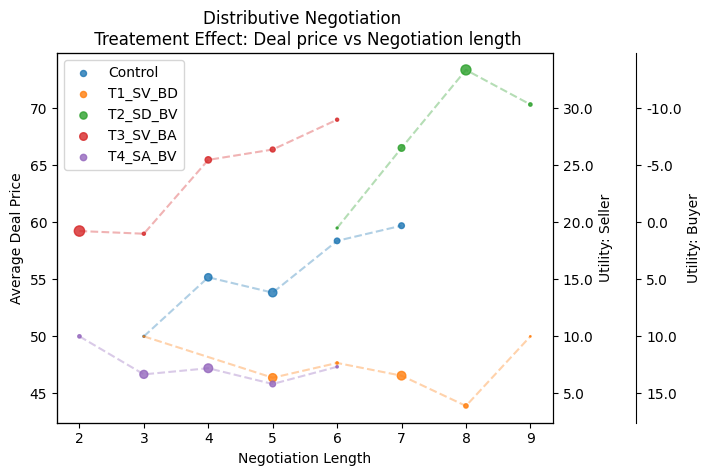

In [329]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker


fig, ax1 = plt.subplots(1,1)
ax1.set_xlabel('Negotiation Length')
ax1.set_ylabel('Average Deal Price')


for i,j  in Price_trajectories.items():

    j_ = j[~np.isnan(j['mean'])]
    ax1.plot(j_.index, j_['mean'],linestyle="--", alpha = 0.35)
    ax1.scatter(j_.index, j_['mean'],marker='o',s=j_['count'].values,label=i,alpha = 0.8)
    #plt.errorbar(j_.index, j_['mean'], yerr=j_['std'],marker='o', fmt="--o",#fmt="r--s", 
                                         #ecolor = "gray",#,dash_joinstyle ='miter',
    #             label=i,alpha = 0.35)

plt.title('Distributive Negotiation \n Treatement Effect: Deal price vs Negotiation length')
plt.legend()

#plt.show()


# add a twin axes and set its limits so it matches the first
ax2 = ax1.twinx()
ax2.set_ylabel('Utility: Seller')
ax2.set_ylim(ax1.get_ylim())


ax3 = ax1.twinx()

#ax3.plot(x, y3, 'r', label='y3 (100*cos(x))')
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Utility: Buyer')
ax3.set_ylim(ax1.get_ylim())
#ax3.tick_params('y', colors='r')


def sellers_value_(x,pos,cost_of_production):
    #print(x,pos,willingness_to_pay)
    return sellers_value(x,cost_of_production)


formatter_2 = mticker.FuncFormatter(lambda x, pos: buyers_value_(x,pos,willingness_to_pay))
ax3.yaxis.set_major_formatter(formatter_2)

formatter = mticker.FuncFormatter(lambda x, pos: sellers_value_(x,pos,cost_of_production))
ax2.yaxis.set_major_formatter(formatter)

#buyers_value(offer,willingness_to_pay)

def buyers_value_(x,pos,willingness_to_pay):
    #print(x,pos,willingness_to_pay)
    return buyers_value(x,willingness_to_pay)
    
    


plt.savefig('Images/Distributive/Deal_price_vs_NL.png', dpi=600, bbox_inches="tight")
plt.show()




In [334]:
from scipy.optimize import minimize_scalar

# Define the function Y (as a Python function, not symbolic)
def Y_func(i_val):
    return (i_val - 40) * (60 - i_val)

# Define the bounds for 'i'
bounds = (0, 100)

# Use minimize_scalar to find the minimum of -Y (which maximizes Y)
# Method 'bounded' is suitable for bounded scalar functions.
result = minimize_scalar(lambda i_val: -Y_func(i_val),  # Minimize the negative of Y
                         bounds=bounds,
                         method='bounded',
                         options={'maxiter': 500} # Optional: set max iterations
                         )

# Extract the optimal 'i' value from the result
optimal_i_scipy = result.x

# Calculate the maximum value of Y at the optimal i
max_Y_scipy = Y_func(optimal_i_scipy)

print(f"Optimal i (using scipy.optimize.minimize_scalar): {optimal_i_scipy}")
print(f"Maximum Y (using scipy.optimize.minimize_scalar): {max_Y_scipy}")
print(f"Optimization Status: {result.message}")
print(f"Function Evaluations: {result.nfev}")


Optimal i (using scipy.optimize.minimize_scalar): 50.0
Maximum Y (using scipy.optimize.minimize_scalar): 100.0
Optimization Status: Solution found.
Function Evaluations: 6


 NBS_prod,Nash bargaining solution : (100, 50)
average deal price 
 control : 55.878787878787875
average deal price 
 control : 46.29545454545455
average deal price 
 control : 70.91566265060241
average deal price 
 control : 61.97979797979798
average deal price 
 control : 46.95918367346939


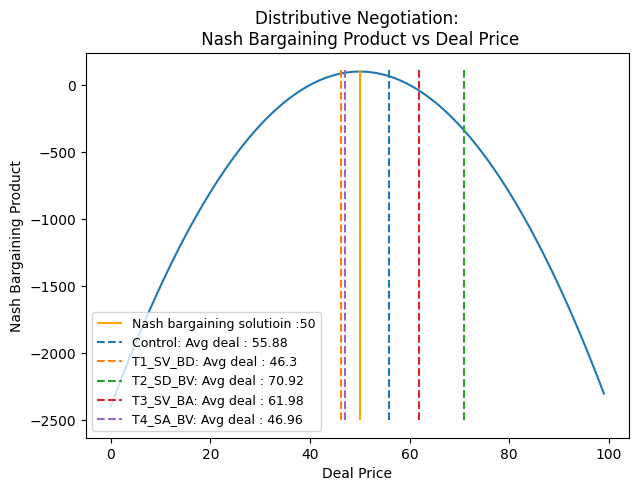

In [376]:
#plotting and calculating NBS : Nash bargaining solution




final_db_distributive_nego_accept

fig,ax = plt.subplots(1,figsize= [7,5])



ax.plot([sellers_value(i,cost_of_production)*buyers_value(i,willingness_to_pay)   for i in range(0,100)])
#NBS_t = max([(sellers_value(i,cost_of_production)*buyers_value(i,willingness_to_pay),i)   for i in range(0,100)])
print( f" NBS_prod,Nash bargaining solution : {NBS_t}")
ax.vlines(optimal_i_scipy,ymin=-2500,ymax = 110,color = 'orange',linestyle='-', label = f'Nash bargaining solutioin :{NBS_t[1]}')


cmap_ = plt.rcParams['axes.prop_cycle'].by_key()['color']


for i,j in enumerate(['Control','T1_SV_BD', 'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV']):
    #fig,ax = plt.subplots(1)
    temp_filter_df = final_db_distributive_nego_accept[ (final_db_distributive_nego_accept[j]==1)]

    ax.vlines(temp_filter_df.last_price.mean(),ymin=-2500,ymax = 110,color = cmap_[i],linestyle='--', label = f'{j}: Avg deal : {np.around(temp_filter_df.last_price.mean(),2)}')
    #plt.vlines(results_db_disa_seller.last_price.mean(),ymin=-2500,ymax = 110,color = 'blue',linestyle='--', label = f'Treatment Avg deal :{results_db_disa_seller.last_price.mean()}')

    print(f"average deal price \n control : {temp_filter_df.last_price.mean()}")
plt.legend(loc='upper left',fontsize = 9)



plt.ylabel('Nash Bargaining Product')

plt.xlabel('Deal Price')

plt.title('Distributive Negotiation:\n Nash Bargaining Product vs Deal Price')

plt.legend(loc='lower left',fontsize = 9)

plt.savefig('Images/Distributive/NBP_vs_DP.png', dpi=600, bbox_inches="tight")
plt.show()

In [330]:
final_db_distributive_nego_accept.columns

Index(['price', 'action', 'turn', 'last_price', 'reject',
       'offer_counteroffer_diff', 'start_finish_diff', 'U_s', 'U_b', 'G',
       'exp_id', 'first_price', 'negotiation_length', 'Control', 'T1_SV_BD',
       'T2_SD_BV', 'T3_SV_BA', 'T4_SA_BV', 'Seller_A', 'Seller_D', 'Buyer_A',
       'Buyer_D', 'G_2', 'B_fairness', 'S_fairness', 'RFD'],
      dtype='object')

# integrative

In [389]:
results_db_inte_SABV= pd.read_pickle(f'data/{8}results_db_inte_SABV.pkl')
results_db_inte_SVBA= pd.read_pickle(f'data/{9}results_db_inte_SVBA.pkl')
results_db_inte_SDBV= pd.read_pickle(f'data/{7}results_db_inte_SDBV.pkl')
results_db_inte_SVBD= pd.read_pickle(f'data/{6}results_db_inte_SVBD.pkl')
results_db_inte_VV= pd.read_pickle(f'data/{5}results_db_inte_VV.pkl')

In [392]:
results_db_inte_VV['Control'] = 1
results_db_inte_VV['T4_SABV'] = 0
results_db_inte_VV['T3_SVBA'] = 0
results_db_inte_VV['T2_SDBV'] = 0
results_db_inte_VV['T1_SVBD'] = 0


results_db_inte_SABV['Control'] = 0
results_db_inte_SABV['T4_SABV'] = 1
results_db_inte_SABV['T3_SVBA'] = 0
results_db_inte_SABV['T2_SDBV'] = 0
results_db_inte_SABV['T1_SVBD'] = 0


results_db_inte_SVBA['Control'] = 0
results_db_inte_SVBA['T4_SABV'] = 0
results_db_inte_SVBA['T3_SVBA'] = 1
results_db_inte_SVBA['T2_SDBV'] = 0
results_db_inte_SVBA['T1_SVBD'] = 0


results_db_inte_SDBV['Control'] = 0
results_db_inte_SDBV['T4_SABV'] = 0
results_db_inte_SDBV['T3_SVBA'] = 0
results_db_inte_SDBV['T2_SDBV'] = 1
results_db_inte_SDBV['T1_SVBD'] = 0

results_db_inte_SVBD['Control'] = 0
results_db_inte_SVBD['T4_SABV'] = 0
results_db_inte_SVBD['T3_SVBA'] = 0
results_db_inte_SVBD['T2_SDBV'] = 0
results_db_inte_SVBD['T1_SVBD'] = 1


In [393]:
final_db_inte_nego  = pd.concat([results_db_inte_SABV
,results_db_inte_SVBA
,results_db_inte_SDBV
,results_db_inte_SVBD
,results_db_inte_VV],axis =0, ignore_index=True)

In [396]:
final_db_inte_nego.

Index(['price', 'p1_val', 'p2_val', 'action', 'turn', 'expected_profit',
       'last_price', 'reject', 'Join_utility', 'offer_counteroffer_diff_JU',
       'offer_counteroffer_diff_P1', 'offer_counteroffer_diff_P2',
       'start_finish_diff_JU', 'start_finish_diff_P1', 'start_finish_diff_P2',
       'U_s', 'U_b', 'G_whole', 'G', 'exp_id', 'first_price',
       'negotiation_length', 'Control', 'T4_SABV', 'T3_SVBA', 'T2_SDBV',
       'T1_SVBD'],
      dtype='object')

In [403]:
final_db_inte_nego['First_Us'] = final_db_inte_nego['p1_val'].apply(lambda x: x[0])
final_db_inte_nego['First_Ub'] = final_db_inte_nego['p2_val'].apply(lambda x: x[0])

In [406]:
final_db_inte_nego[['Control', 'T1_SVBD', 'T2_SDBV', 'T3_SVBA', 'T4_SABV', 'First_Us','First_Ub', 
                    'offer_counteroffer_diff_P1', 'offer_counteroffer_diff_P2','offer_counteroffer_diff_JU'
                    ,  'negotiation_length','U_s', 'U_b']].corr()#['first_price'][0]

,Control,T1_SVBD,T2_SDBV,T3_SVBA,T4_SABV,First_Us,First_Ub,offer_counteroffer_diff_P1,offer_counteroffer_diff_P2,offer_counteroffer_diff_JU,negotiation_length,U_s,U_b
Control,1.000000,-0.252215,-0.250633,-0.247463,-0.250633,-0.109448,0.098930,-0.152181,0.129794,0.100464,-0.116015,0.038706,-0.026225
T1_SVBD,-0.252215,1.000000,-0.252215,-0.249025,-0.252215,-0.079443,0.058180,0.133865,-0.155047,0.171300,0.330386,-0.447454,0.438561
T2_SDBV,-0.250633,-0.252215,1.000000,-0.247463,-0.250633,0.684445,-0.623885,0.554678,-0.472035,-0.657239,0.464951,0.419996,-0.382687
T3_SVBA,-0.247463,-0.249025,-0.247463,1.000000,-0.247463,-0.103036,0.079033,-0.249630,0.236638,0.127033,-0.361403,0.178922,-0.203424
T4_SABV,-0.250633,-0.252215,-0.250633,-0.247463,1.000000,-0.393007,0.388127,-0.289146,0.263043,0.258769,-0.321928,-0.187116,0.170567
First_Us,-0.109448,-0.079443,0.684445,-0.103036,-0.393007,1.000000,-0.952349,0.764804,-0.681427,-0.822625,0.419904,0.483478,-0.427310
First_Ub,0.098930,0.058180,-0.623885,0.079033,0.388127,-0.952349,1.000000,-0.754772,0.722277,0.870085,-0.392494,-0.410438,0.395017
offer_counteroffer_diff_P1,-0.152181,0.133865,0.554678,-0.249630,-0.289146,0.764804,-0.754772,1.000000,-0.943484,-0.703669,0.542581,-0.084596,0.092093
offer_counteroffer_diff_P2,0.129794,-0.155047,-0.472035,0.236638,0.263043,-0.681427,0.722277,-0.943484,1.000000,0.725392,-0.489668,0.143492,-0.187707
offer_counteroffer_diff_JU,0.100464,0.171300,-0.657239,0.127033,0.258769,-0.822625,0.870085,-0.703669,0.725392,1.000000,-0.296485,-0.348251,0.304654


In [408]:

correlation_var_2 = ['Control', 'T1_SVBD', 'T2_SDBV', 'T3_SVBA', 'T4_SABV', 'First_Us','First_Ub', 
                    'offer_counteroffer_diff_P1', 'offer_counteroffer_diff_P2','offer_counteroffer_diff_JU'
                    ,  'negotiation_length','U_s', 'U_b']


corre_df = final_db_inte_nego[correlation_var_2] 
rho = corre_df.corr()
pval = corre_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho_2 = rho.round(2).astype(str) + p


Correlation_chart = pd.DataFrame(np.tril(rho_2, k=0),columns = corre_df.columns,index = corre_df.columns).replace(0,"")

for i in Correlation_chart.columns:
    for j in Correlation_chart.index:
        if i==j:
            Correlation_chart.loc[i,j] ="--"
pd.concat( [pd.DataFrame([corre_df.mean(),corre_df.std()],index = ['Mean','STD']).T.map(lambda x: np.around(x,2)), Correlation_chart  ],axis=1       )

,Mean,STD,Control,T1_SVBD,T2_SDBV,T3_SVBA,T4_SABV,First_Us,First_Ub,offer_counteroffer_diff_P1,offer_counteroffer_diff_P2,offer_counteroffer_diff_JU,negotiation_length,U_s,U_b
Control,0.20,0.40,--,,,,,,,,,,,,
T1_SVBD,0.20,0.40,-0.25***,--,,,,,,,,,,,
T2_SDBV,0.20,0.40,-0.25***,-0.25***,--,,,,,,,,,,
T3_SVBA,0.20,0.40,-0.25***,-0.25***,-0.25***,--,,,,,,,,,
T4_SABV,0.20,0.40,-0.25***,-0.25***,-0.25***,-0.25***,--,,,,,,,,
First_Us,5639.07,1390.65,-0.11*,-0.08,0.68***,-0.1*,-0.39***,--,,,,,,,
First_Ub,2453.85,1405.54,0.1*,0.06,-0.62***,0.08,0.39***,-0.95***,--,,,,,,
offer_counteroffer_diff_P1,2075.30,1814.67,-0.15***,0.13**,0.55***,-0.25***,-0.29***,0.76***,-0.75***,--,,,,,
offer_counteroffer_diff_P2,-1853.04,1831.09,0.13**,-0.16***,-0.47***,0.24***,0.26***,-0.68***,0.72***,-0.94***,--,,,,
offer_counteroffer_diff_JU,-605.87,1456.20,0.1*,0.17***,-0.66***,0.13**,0.26***,-0.82***,0.87***,-0.7***,0.73***,--,,,


In [ ]:
B_NBS = buyers_value(50,willingness_to_pay)

S_NBS =  sellers_value(50,cost_of_production)


B_NBS_farthest = max( np.absolute(buyers_value(100,willingness_to_pay) - B_NBS) ,np.absolute( buyers_value(0,willingness_to_pay)- B_NBS ) ) 

S_NBS_farthest = max( np.absolute(sellers_value(100,cost_of_production) - S_NBS) ,np.absolute( sellers_value(0,cost_of_production)- S_NBS ) ) 



final_db_distributive_nego_accept['B_fairness'] = (final_db_distributive_nego_accept['U_b'] - B_NBS ) /B_NBS_farthest 
final_db_distributive_nego_accept['S_fairness'] = (final_db_distributive_nego_accept['U_s'] - S_NBS ) /S_NBS_farthest

#final_db_distributive_nego_accept['RFD'] =   final_db_distributive_nego_accept.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1

final_db_distributive_nego_accept['RFD'] =   (final_db_distributive_nego_accept['S_fairness'] - final_db_distributive_nego_accept['B_fairness'] )/2    #.apply(lambda x: min(x['B_fairness'], x['S_fairness']), axis =1)*-1


